In [1]:
import sys
import torch
import torch.nn.functional as F
from torch.nn import Linear
import torch_geometric.transforms as T
from torch_geometric.nn import SAGEConv, to_hetero
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from torch_geometric.nn import GCNConv, GATConv
from tqdm.notebook import tqdm
import gc
import pickle
from sklearn.manifold import TSNE
import seaborn as sns
#from utils import create_data_object_heterogeneous, load_data_heterogeneous

from cluster_utils import evaluate_items #, print_memory, reduce_features, get_edge_indices,

sns.set_theme(context='talk', style='white')
MINSAMPLES = 10
RELOAD = False

from vis_utils import (visualize_students, visualize_edges_age, visualize_edges, visualize_items, myresults, FIGSIZE,
CLUSTER_LABELS, NPERMS, AGE_THR, DPI)

OUTNAME = 'SAGE'
CONV = SAGEConv if OUTNAME == 'SAGE' else GATConv

In [2]:
torch.cuda.empty_cache()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load(f'./results/{OUTNAME}.pth.tar')
#model = torch.load(f'./results/checkpoint.pth.tar')


In [3]:
import pickle 
with open(f'./results/{OUTNAME}_aux_data.pkl', 'rb') as handle:
    aux_data = pickle.load(handle)
    
(df, df_student, df_item, df_edge, 
            train_losses, #test_losses, test_aucs,
            train_edge_indices, val_edge_indices, test_edge_indices, 
            data, train_data, val_data, test_data,
            unique_scales, unique_domains, unique_matdiff, 
            DATA_FILE) = aux_data

In [4]:
if RELOAD:
    df = load_data_heterogeneous(DATA_FILE)
    data, df_student, df_item, df_edge = create_data_object_heterogeneous(df)

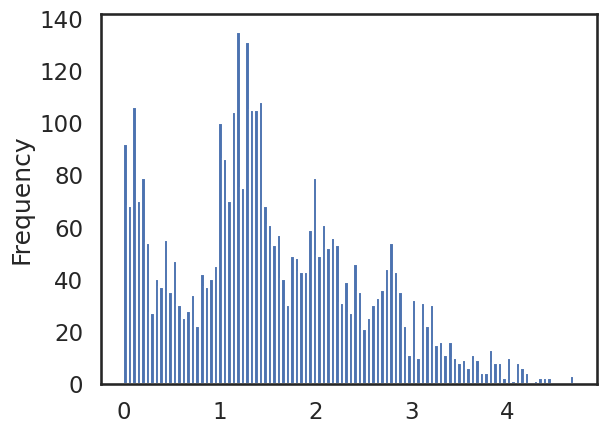

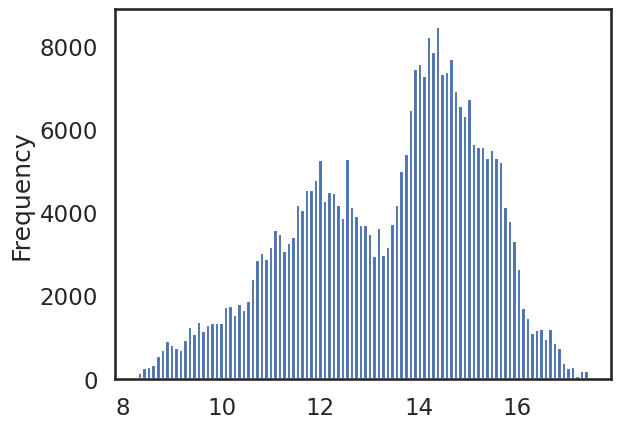

In [5]:
%matplotlib inline
age_ranges = df.groupby('studentId').age.apply(lambda x: x.max() - x.min())
fig = plt.figure()
age_ranges.plot.hist(bins=100)
plt.show()

fig = plt.figure()
df.age.plot.hist(bins=100)
age_ranges = df.groupby('studentId').age.apply(lambda x: x.max() - x.min())

plt.show()

65.0

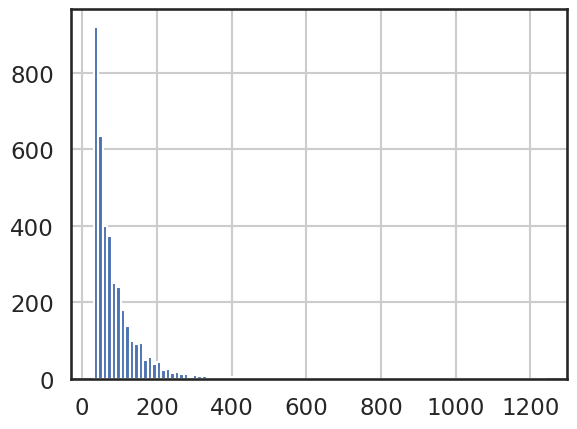

In [6]:
# different items per student
df.groupby(['studentId']).code.nunique().hist(bins=100)
df.groupby(['studentId']).code.nunique().median()

5.0

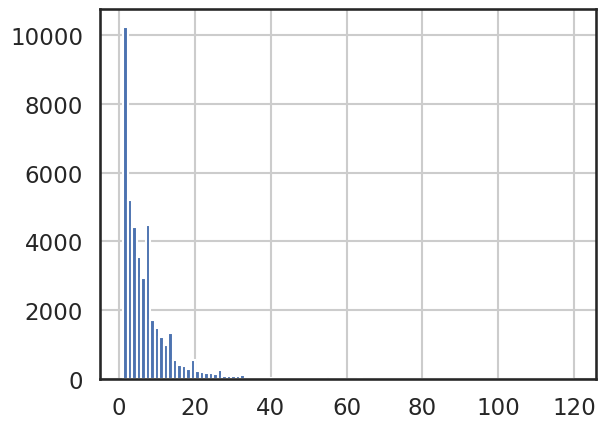

In [7]:
df.groupby(['assessmentId']).code.nunique().hist(bins=100)
df.groupby(['assessmentId']).code.nunique().median()

In [8]:
age_ranges.mean()

1.5405901032019054

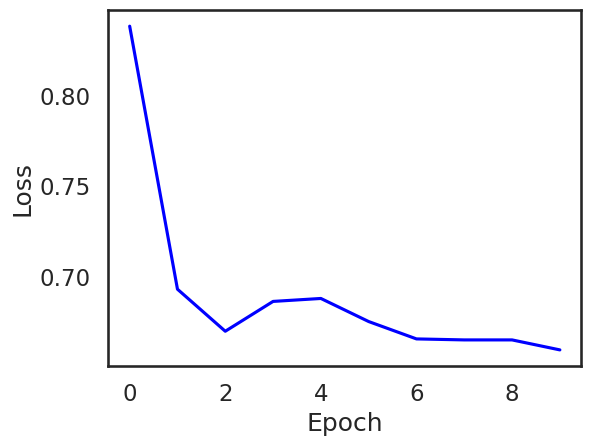

In [9]:
train_indices = np.arange(len(train_losses))
fig = plt.figure()
plt.plot(train_indices, train_losses, c='blue')
plt.ylabel('Loss')
plt.xlabel('Epoch')

fig.tight_layout()
plt.savefig(f'./vis/{OUTNAME}_losses.png', dpi=DPI)

In [10]:
#%matplotlib inline
%reload_ext autoreload
%autoreload 2
from vis_utils import visualize_items, visualize_students, visualize_edges
EQUAL_AXES=False

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

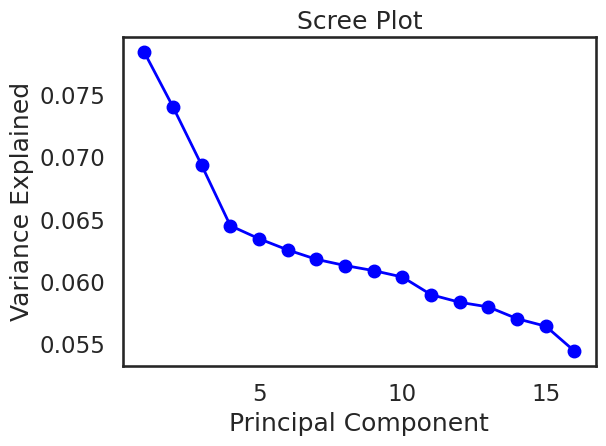

In [11]:
visualize_items(model, train_data, device, df_item, OUTNAME, equal_axes=EQUAL_AXES)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

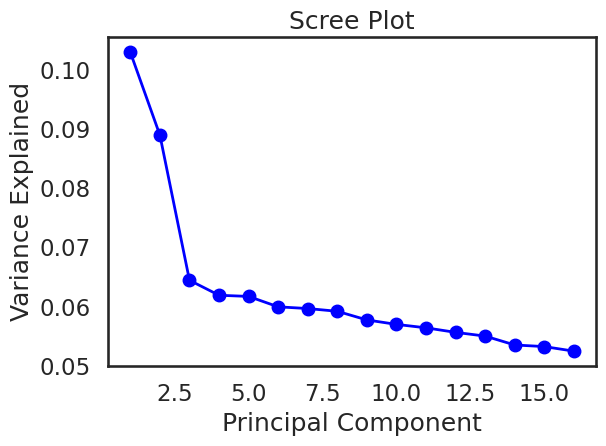

In [12]:
visualize_students(model, train_data, device, df_student, OUTNAME, equal_axes=EQUAL_AXES)

In [13]:
%reload_ext autoreload
%autoreload 2
from vis_utils import visualize_edges
#visualize_edges(model, train_data, train_edge_indices, device, df, OUTNAME, 
#                equal_axes=EQUAL_AXES, with_lines=False, aggregate=False, AGE_THR=AGE_THR)

In [14]:
df.head()

,studentId,code,motherTongue,Gender,scale,matrix,IRT_difficulty,topic,responseformat,textlength,...,timestamp,useCase,assessmentId,ability,frequency,previous_sessions,years_from_start,matdiff,matcode,domain
0,0,0,0.0,0.0,dles,D.2.B.1.f,0.268748,Zeitungsartikel,NaN,NaN,...,7.643058e-312,ms-kber,5E9436B294DBE2FB740ADDCF2B883ECB2254B5F0D37D8E...,2.667269,13.333162,2,0.15,,,d
1,0,1,0.0,0.0,dles,D.2.B.1.h,1.217388,Textsorten erkennen,single choice,NaN,...,7.643061e-312,ms-kber,5E9436B294DBE2FB740ADDCF2B883ECB2254B5F0D37D8E...,2.667269,13.333162,2,0.15,,,d
2,0,2,0.0,0.0,dles,D.2.B.1.h,1.584145,Wissenstexte: Mix,single choice,NaN,...,7.845624e-312,ms-kber,E109B3CDD31EDCFE7F48665587372C60A3FAEBB8571544...,2.421279,4.137915,6,1.45,,,d
3,0,3,0.0,0.0,dles,D.2.B.1.h,1.584145,Wissenstexte: Mix,single choice,NaN,...,7.851631e-312,ms-kber,319A0FE3AFDC0A30C4C1B26577B5B19FE66E918A181354...,2.174872,7.432378,11,1.48,,,d
4,0,4,0.0,0.0,dles,D.2.C.1.h,1.172410,Geschichten lang,single choice,NaN,...,7.643059e-312,ms-kber,5E9436B294DBE2FB740ADDCF2B883ECB2254B5F0D37D8E...,2.667269,13.333162,2,0.15,,,d


In [15]:
#np.sum(df.ability.isnull() == False)

In [16]:
#visualize_edges(model, train_data, train_edge_indices, device, df, OUTNAME, 
#                equal_axes=EQUAL_AXES, with_lines=True, aggregate=True, AGE_THR=AGE_THR)

In [17]:
myresults.output_stats()

In [18]:
#print(domain_train)
#print(domain_train_rand)
#print(domain_val)

Indices by scale

In [19]:
%reload_ext autoreload
%autoreload 2
scores_dict = {'CH': [], 'SH': [], 'DB':[]}
distances_dict = {'within': [], 'between': []}

for perm in range(NPERMS):
    scores, within_domain, between_domain, mean_distances = evaluate_items(model, train_data, df_item, device, 
                                                                           shuffle=perm>0, 
                                                                           seed=0, 
                                                                           minsamples=MINSAMPLES)
    [ scores_dict[key].append(scores[key]) for key in scores_dict]
    distances_dict['within'].append(within_domain)
    distances_dict['between'].append(between_domain)

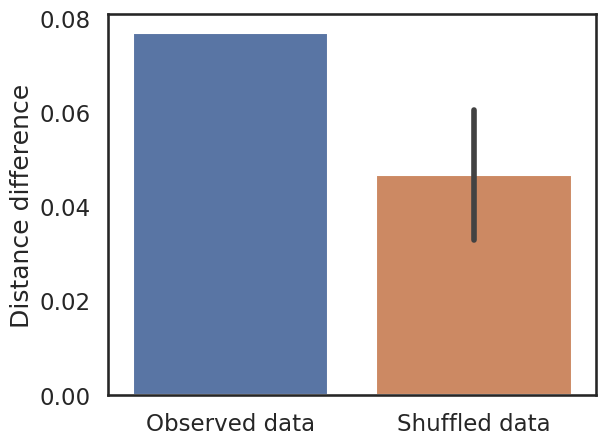

In [20]:
distances_df = pd.DataFrame(distances_dict)
distances_df['perm'] = distances_df.index
#distances_df = pd.melt(distances_df, id_vars='perm', value_name='index', var_name='group')
distances_df['random'] = 'Observed data'
distances_df.loc[ distances_df['perm'] > 0, 'random'] = 'Shuffled data'
distances_df['diff'] = distances_df['between'] - distances_df['within'] 
fig = plt.figure()
ax = sns.barplot(data=distances_df, x='random', y='diff', errorbar='sd')
ax.set(xlabel='', ylabel='Distance difference')
fig.tight_layout()

plt.savefig(f'./vis/{OUTNAME}_bw.png', dpi=DPI)

In [21]:
#fig, axes = plt.subplots(1, 2, figsize=(16, 6))
from matplotlib.category import UnitData

for i, index in enumerate(['CH', 'DB']): #scores_dict
    fig = plt.figure(figsize=(FIGSIZE))
   
    scores_df = pd.DataFrame(scores_dict[index])
    scores_df['perm'] = scores_df.index
    scores_df = pd.melt(scores_df, id_vars='perm', value_name='index', var_name='scale')
    scores_df['random'] = 'Observed data'
    scores_df.loc[ scores_df['perm'] > 0, 'random'] = 'Shuffled data'
    #plt.figure()
    scores_df['scale'] = pd.Categorical(scores_df['scale'], categories=np.sort(scores_df.scale.unique()))
    axes = sns.barplot(data=scores_df, x='scale', y='index', hue='random', errorbar='sd')
    axes.legend_.remove()
    axes.set_xlabel('Competence Domain')
    axes.set_ylabel('Cluster Validity Index Value')
    axes.set_title(CLUSTER_LABELS[index])
    axes.tick_params(axis='x', rotation=90)
    fig.tight_layout()
    plt.savefig(f'./vis/{OUTNAME}_bw_random_{index}.png', dpi=DPI)
    plt.close()

In [22]:
DIFFICULTY_BINS = 21
df_item['IRT_difficulty_binned'] = pd.cut(df_item['IRT_difficulty'], DIFFICULTY_BINS).astype(str)
df_item['scalexdifficulty'] = df_item.apply(lambda x: x.scale + ' ' + 
                                            x.IRT_difficulty_binned if x.IRT_difficulty_binned != 'nan' else pd.NA, axis=1)

In [23]:
%reload_ext autoreload
%autoreload 2
from vis_utils import plot_clustering # evaluate_items, compute_clustering_indices
   
plot_clustering('scalexdifficulty', 'topic', model, val_data, df_item, device, OUTNAME, minsamples=MINSAMPLES)
plot_clustering('scalexdifficulty', 'matrix', model, val_data, df_item, device, OUTNAME, minsamples=MINSAMPLES)

%matplotlib inline 
EQUAL_AXES = False
ALPHA = 0.6
FIGSIZE2 = (12, 6)

visualize_edges_age(model, train_data, train_edge_indices, device, df, OUTNAME , equal_axes=EQUAL_AXES, 
                             age_window=(8, 11), aggregate=True, hue_label='motherTongue', with_lines=True, save=False)        

visualize_edges_age(model, train_data, train_edge_indices, device, df, OUTNAME, equal_axes=EQUAL_AXES, 
                             age_window=(8, 13), aggregate=True, hue_label='age', with_lines=True, save=False)        

visualize_edges_age(model, train_data, train_edge_indices, device, df, OUTNAME, equal_axes=EQUAL_AXES, 
                             age_window=(11, 18), aggregate=True, hue_label='age', with_lines=True, save=False)